### Hyperparameters

#### Models and tasks

<table border="1">
  <thead>
    <tr>
      <th>Model</th>
      <th>Regression</th>
      <th>Classification</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>Yes</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Logistic Regression</td>
      <td>No</td>
      <td>Yes</td>
    </tr>
  </tbody>
</table>



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
X,y=make_classification(n_samples=1000,
                        n_features=2,
                        n_informative=2,
                        n_redundant=0,
                        random_state=42,
                        n_clusters_per_class=1,
                        class_sep=2)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
mod=LogisticRegression()
mod.fit(X_train,y_train)
y_pred1=mod.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test,y_pred1)

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6, edgecolors='k')

plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mod.coef_
mod.intercept_

In [ ]:
def plot_decision_boundary(w,b,X,y):
    x_values=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
    y_values=-(w[0][0]*x_values +b[0])/w[0][1]
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.plot(x_values,y_values,color='red')
    plt.show()

In [ ]:
plot_decision_boundary(mod.coef_,mod.intercept_,X_train,y_train)

In [19]:
class Mylogisticregression:
    def __init__(self,lr=0.01,n_iters=1000):
        self.w=None
        self.b=None
        self.lr=lr
        self.n_iters=n_iters
        self.loss=[]
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0

        for i in range(self.n_iters):
            model=np.dot(X,self.w)+self.b
            y_pred=self.sigmoid(model)

            dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
            db=(1/n_samples)*np.sum(y_pred-y)

            self.w -= self.lr*dw
            self.b -= self.lr*db
            loss=self.log_loss(y,y_pred)
            self.loss.append(loss)
            if i%500==0:
              self.plot_decision_boundary(X,y,i)
    def predic_proba(self,X):
        lin_output= np.dot(X,self.w)+self.b
        return self.sigmoid(lin_output)
    def predict(self,X):
        proba=self.predic_proba(X)
        return np.where(proba > 0.5,1,0)
    def plot_decision_boundary(self,X,y,k):
        x_values=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
        y_values=-(self.w[0]*x_values +self.b)/self.w[1]
        plt.scatter(X[:,0],X[:,1],c=y)
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.title(f'iteration:{k}')
        plt.plot(x_values,y_values,color='red')
        plt.show()
    def log_loss(self,y,y_predicted):
        eps=1e-15
        y_predicted=np.clip(y_predicted,eps,1-eps)
        loss=-np.mean(y *np.log(y_predicted)+(1-y)* np.log(1-y_predicted))
        return loss
    def plot_loss(self):
        plt.plot(range(self.n_iters),self.loss)
        plt.xlabel('iterations')
        plt.ylabel('losses')
        plt.title('loss values')



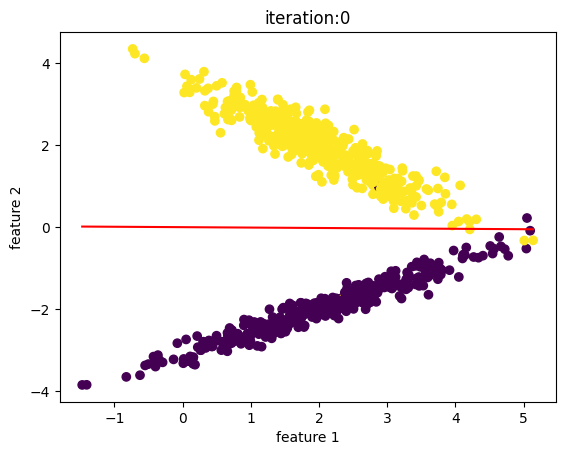

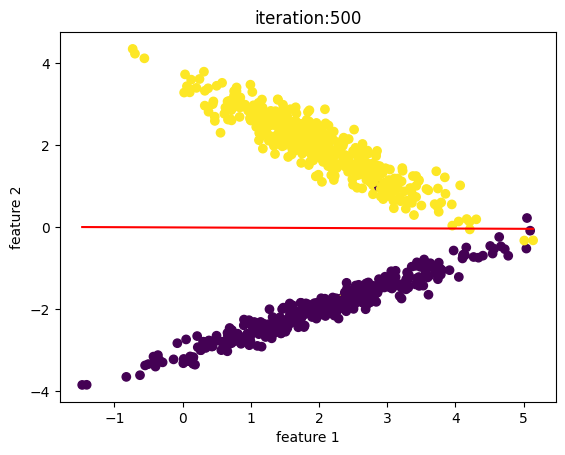

0.995

In [20]:
mod1=Mylogisticregression()
mod1.fit(X_train,y_train)
y_pred2=mod1.predict(X_test)
accuracy_score(y_test,y_pred2)

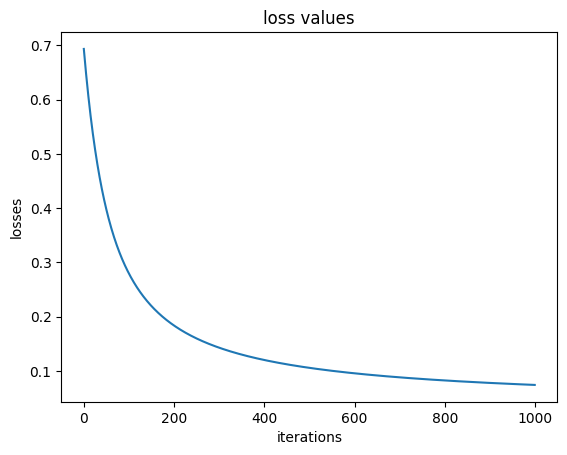

In [21]:
mod1.plot_loss()

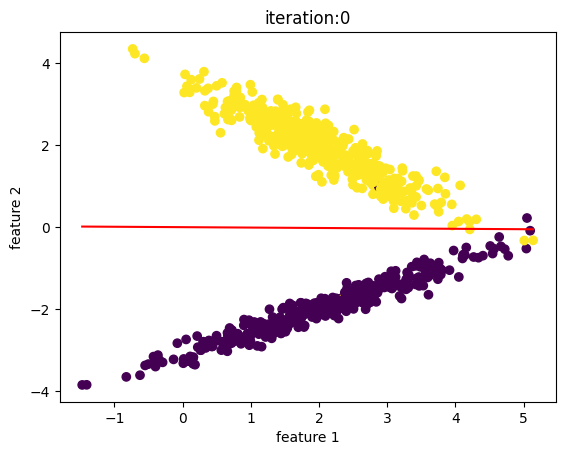

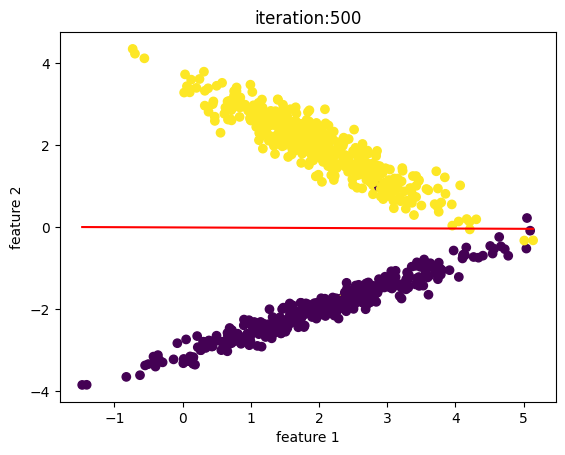

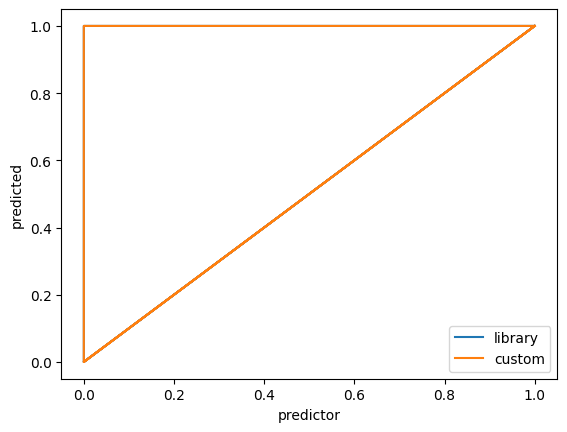

In [23]:
mod1=LogisticRegression()
mod2=Mylogisticregression()

mod1.fit(X_train,y_train)
y_pred_lib=mod1.predict(X_test)
mod2.fit(X_train,y_train)
y_pred_custom=mod2.predict(X_test)

plt.plot(y_test,y_pred_lib,label='library')
plt.plot(y_test,y_pred_custom,label='custom')
plt.xlabel('predictor')
plt.ylabel('predicted')
plt.legend()
plt.show()

[0.01614348 1.7905904 ]
[[-0.07305151  3.25737152]]
0.995


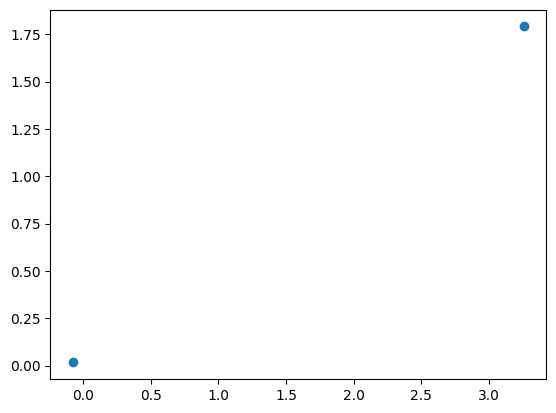

In [28]:
plt.scatter(mod1.coef_,mod2.w)
print(mod2.w)
print(mod1.coef_)
print(accuracy_score(y_test,y_pred_custom))